No white noise variance is specified!! Using default value of 2.5e-6 (Dimensionless fractional noise)
Generating gain noise with parameters: f0=1.4e-05, fc=0.001, alpha=2.                            Note that these 1/f noise are uncorrelated between frequencies.


100%|██████████| 100/100 [00:05<00:00, 19.37it/s]


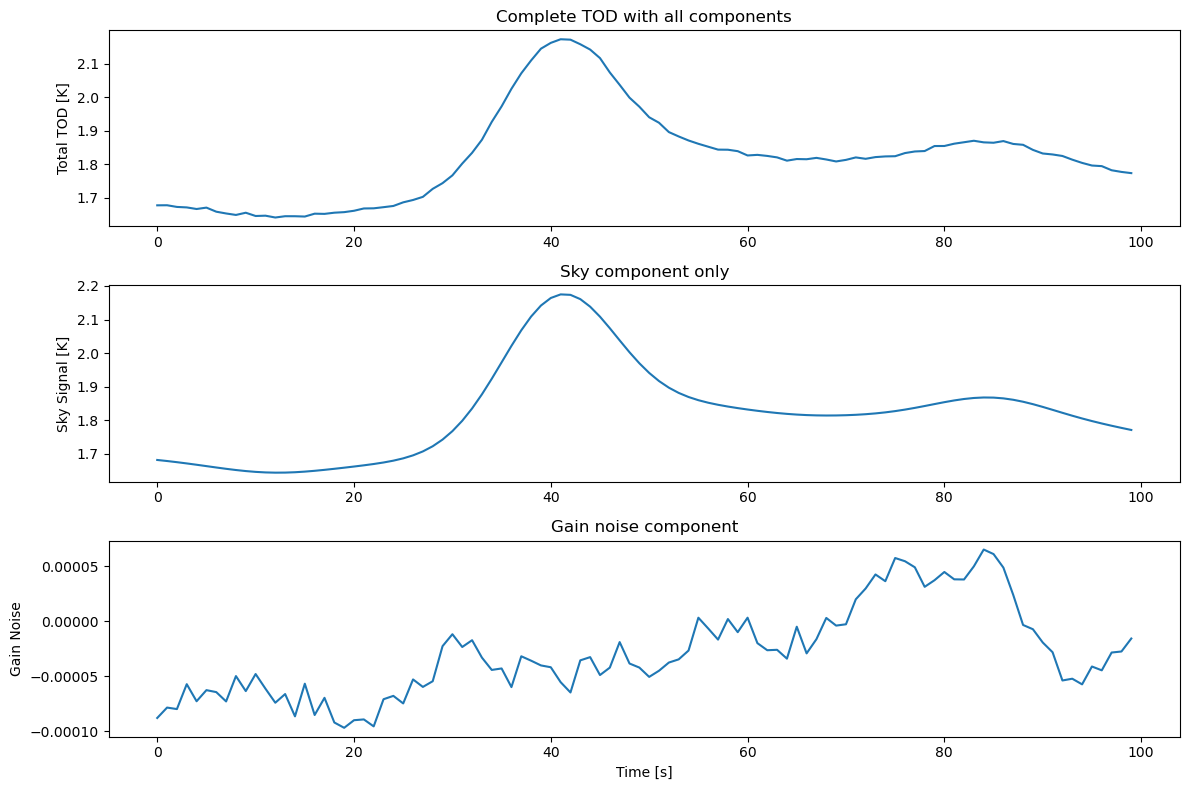

In [12]:
import numpy as np
from tod_simulator import meerTODsim, example_scan
import matplotlib.pyplot as plt

# Initialize simulator
sim = meerTODsim(nside=128)  # Lower resolution for speed

# Generate scanning pattern
time_list, az_list = example_scan(dt=1.0)

# Single frequency simulation
tod, sky_tod, gain_noise = sim.generate_TOD(
    freq_list=[1000],  # 1 GHz
    time_list=time_list[:100],  # First 100 time points
    azimuth_deg_list=az_list[:100],
    elevation_deg=45.0
)

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

ax1.plot(time_list[:100], tod[0])
ax1.set_ylabel('Total TOD [K]')
ax1.set_title('Complete TOD with all components')

ax2.plot(time_list[:100], sky_tod[0])
ax2.set_ylabel('Sky Signal [K]')
ax2.set_title('Sky component only')

ax3.plot(time_list[:100], gain_noise)
ax3.set_ylabel('Gain Noise')
ax3.set_xlabel('Time [s]')
ax3.set_title('Gain noise component')

plt.tight_layout()
plt.show()

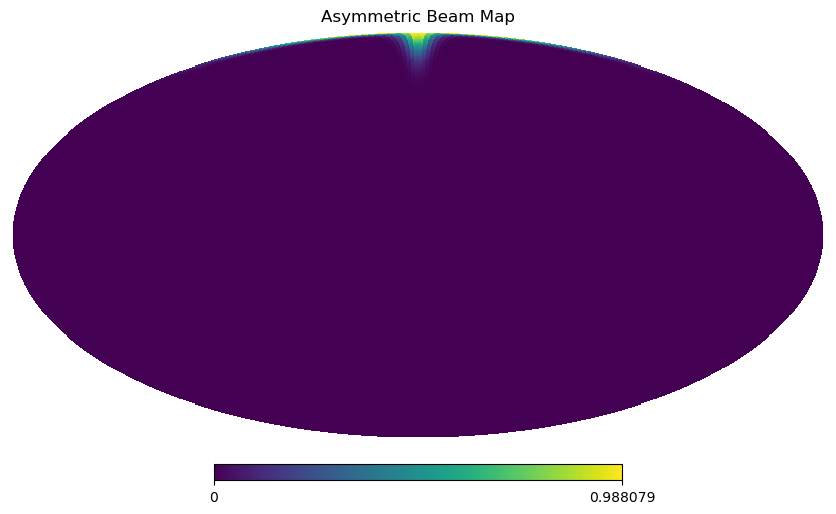

In [7]:
from tod_simulator import example_beam_map
import healpy as hp
# Example asymmetric beam:
asym_beam = example_beam_map(900, FWHM_major=25, FWHM_minor=5, nside=64)
# Visualize the beam map
hp.mollview(asym_beam, title='Asymmetric Beam Map')

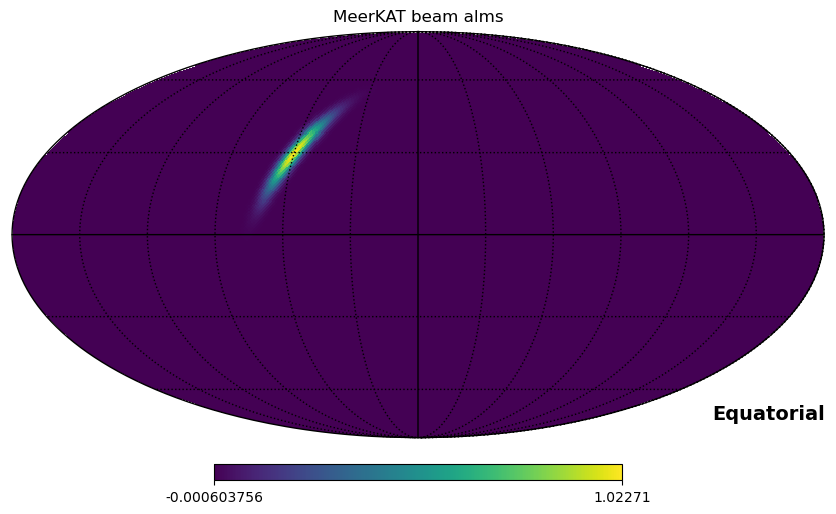

In [10]:
from tod_simulator import pointing_beam_in_eq_sys

# Pointed Beam Specifications 
LST_deg = 60  # degrees
lat_deg = 30  # degrees
azimuth_deg = 30  # degrees
elevation_deg = 90  # degrees

beam_alm = hp.map2alm(asym_beam)

pointed_beam = pointing_beam_in_eq_sys(beam_alm, LST_deg, lat_deg, azimuth_deg, elevation_deg, nside=64)


hp.mollview(pointed_beam, title="MeerKAT beam alms", coord="C")

hp.graticule()


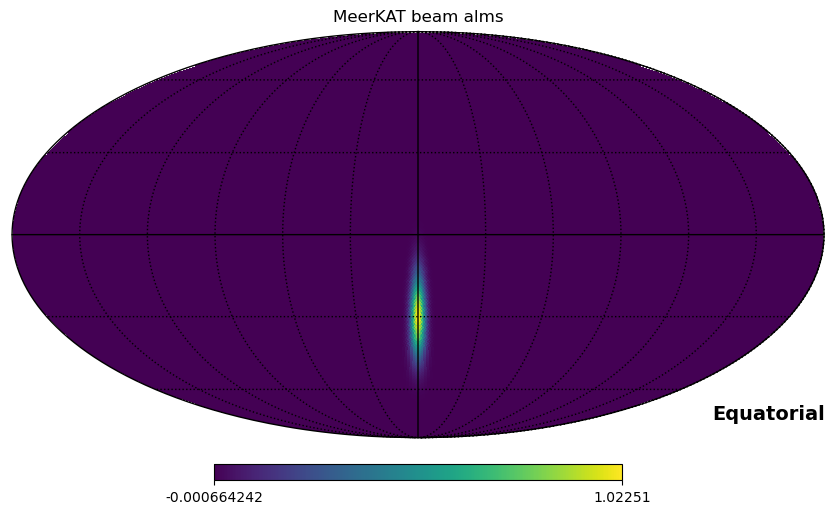

In [ ]:
from tod_simulator import pointing_beam_in_eq_sys

# Pointed Beam Specifications 
LST_deg = 60  # degrees
lat_deg = 30  # degrees
azimuth_deg = 30  # degrees
elevation_deg = 0  # degrees

beam_alm = hp.map2alm(asym_beam)

pointed_beam = pointing_beam_in_eq_sys(beam_alm, LST_deg, lat_deg, azimuth_deg, elevation_deg, nside=64)


hp.mollview(pointed_beam, title="MeerKAT beam alms", coord="C")

hp.graticule()


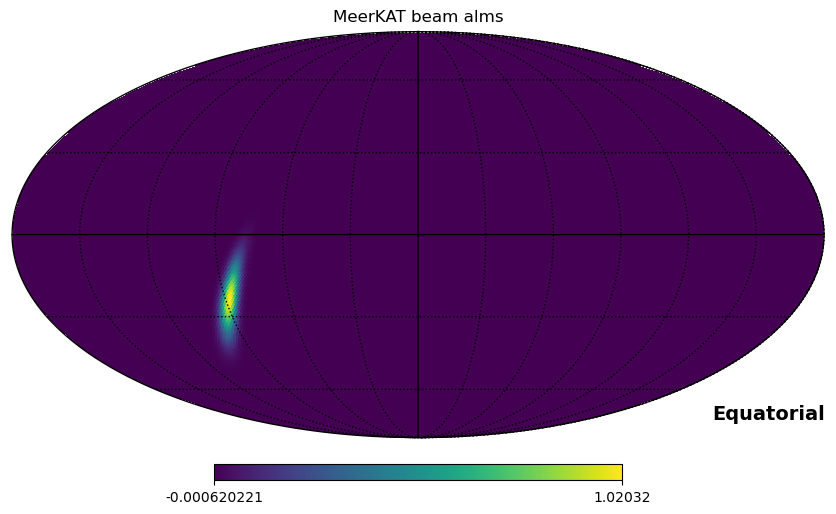

In [11]:
# Pointed Beam Specifications 
LST_deg = 60  # degrees
lat_deg = 30  # degrees
azimuth_deg = 30  # degrees
elevation_deg = 30  # degrees

beam_alm = hp.map2alm(asym_beam)

pointed_beam = pointing_beam_in_eq_sys(beam_alm, LST_deg, lat_deg, azimuth_deg, elevation_deg, nside=64)


hp.mollview(pointed_beam, title="MeerKAT beam alms", coord="C")

hp.graticule()